# Signal Verification Notebook (Windows)

This notebook provides some useful tests to assess the quality of the signals acquired by the python-AcqBIT application (name is a work in progress).

In [1]:
import numpy as np
import h5py as h5
import os
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


This first group of cells attempts to retrive the data captured by a device named EDAdevice

fdsjfhsajdfhçajsd

In [2]:
# Fetch created directory
path_name = os.path.join('~', 'Desktop', 'acqBIT')   
user = os.path.expanduser(path_name)
path_to_save = os.path.expanduser(path_name)

user_name = 'New USER'
device_name = 'EDAdevice'
path_to_device_files = path_to_save + '\\' + user_name + '\\' + device_name

list_files = os.listdir(path_to_device_files)

WindowsError: [Error 3] The system cannot find the path specified: 'C:\\Users\\franciscosargo\\Desktop\\acqBIT\\New USER\\EDAdevice/*.*'

In [9]:
# Choose and allocate the acquisition file
f_nr = -1
path_to_file = path_to_device_files + '\\' + list_files[f_nr]
test_file = h5.File(path_to_file, 'r')
f = test_file
r_group = f[f.keys()[0]]  ## get root group with all the datasets

In [4]:
dg_Nr

1

In [3]:
## Print digital signals
dg_Nr = 1
digital_channel_group = 'digital'
digital_channel_name = 'digital_{}'.format(dg_Nr)
channel_dset = r_group[digital_channel_group + '/' + digital_channel_name]
channel_signal = channel_dset[:]
print channel_signal.shape

NameError: name 'r_group' is not defined

In [5]:
r_group['raw'].keys()

[u'channel_1',
 u'channel_2',
 u'channel_3',
 u'channel_4',
 u'channel_5',
 u'channel_6',
 u'nseq']

[1 1 1 ... 1 1 1]


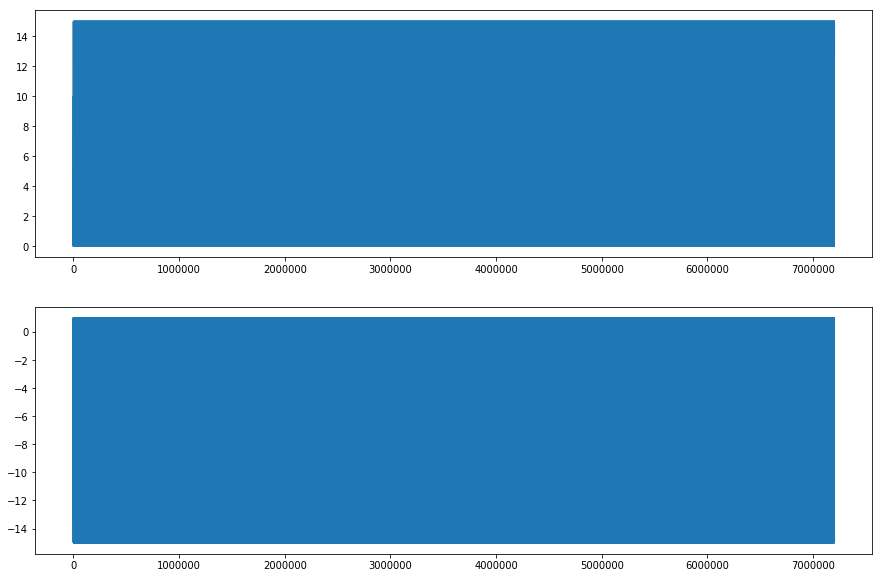

In [6]:
## Check for missing samples
nSeq = r_group['raw/nseq']
nSeq_arr = nSeq[:][:, 0].astype(np.int16)
d_nSeq_arr = np.diff(nSeq_arr)

print d_nSeq_arr

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.plot(nSeq_arr)
plt.subplot(212)
plt.plot(d_nSeq_arr)
plt.show()

In [44]:
np.unique(d_nSeq_arr)
test_file.close()

## 1. Missing Samples quantification

Based on the previous snippets, the quantification of a long-term acquisition run from the application can be made. Since the samples are numbered according to a pre-determined unitary sequence from 0 to 15 (insert reference to BITalino docs), any deviation from unity demonstrates the existance of missing samples. **Note** that one of the main factors for the loss of acquisition samples during a particular run can be the existance of too much computation time inbetween 2 different calls for reading of the serial information from the device. This kind of quantification is thus essential to gauge the performance of continuous long-term acquisition, since it might serve as an indicator of possible bottlenecks caused by software design.   

In effect, since the acquisition for each device is managed by a different subprocess spawned by the main process of the application, the quantification of missing samples can be subdivided by device


The following quantification is related to the acquisition of 3 different devices (named accordingly), on the 30rd of January 2019, from 12:30AM to 08:30AM. 

In [45]:
from datetime import datetime as dt

def get_datetime_file(file_name):
    return dt.strptime(file_name.split('_')[1] + '-' + file_name.split('_')[2].split('.')[0], '%Y-%m-%d-%H-%M-%S')


## General Quantification
device_list = ['EDAdevice', 'HANDdevice', 'ModulaA']
print device_list


long_acq_file_list = [path_to_save + '\\' + user_name + '\\' + device_name + '\\' + file_name 
                      for device_name in device_list
                      for file_name in os.listdir(path_to_save + '\\' + user_name + '\\' + device_name)
                      if get_datetime_file(file_name) > dt(year=2019, month=1, day=31, hour=0, minute=0, second=0)]

## Unspecific quantifiaction
for path_file in long_acq_file_list:
    print path_file
    with h5.File(path_file , 'r+') as f:
        
        # get sequence number
        r_group = f[f.keys()[0]]
        nSeq = r_group['raw/nseq']
        nSeq_arr = nSeq[:][:, 0].astype(np.int16)
        d_nSeq_arr = np.diff(nSeq_arr)
        print np.unique(d_nSeq_arr)

['EDAdevice', 'HANDdevice', 'ModulaA']
C:\Users\franciscosargo\Desktop\acqBIT\New USER\EDAdevice\201604120230_2019-01-31_00-31-13.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\EDAdevice\201604120230_2019-01-31_02-31-14.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\EDAdevice\201604120230_2019-01-31_04-31-15.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\EDAdevice\201604120230_2019-01-31_06-31-17.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\EDAdevice\201604120230_2019-01-31_08-31-18.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\HANDdevice\201607181669_2019-01-31_00-30-42.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\HANDdevice\201607181669_2019-01-31_02-30-43.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\HANDdevice\201607181669_2019-01-31_04-30-44.h5
[-15   1]
C:\Users\franciscosargo\Desktop\acqBIT\New USER\HANDdevice\201607181669_2019-01-31_06-30-46.h5
[-15   1]
C:\Users\franciscosar

## 2. Synchronization quality assessment

## 3. Memory footprint 